In [1]:
import tensorflow as tf

# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Optionally, list details about the available GPU devices
print(tf.config.list_physical_devices('GPU'))


2024-10-28 22:30:05.122895: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 22:30:05.254245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 22:30:05.311762: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 22:30:05.327804: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 22:30:05.430265: I tensorflow/core/platform/cpu_feature_guar

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1730134807.775929   78996 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730134807.935672   78996 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730134807.938091   78996 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [2]:
# importing necessary libraries

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/media/ritika/BAB4DC86B4DC4713/ICDCIT/Dataset_split/train"
test_dir = "/media/ritika/BAB4DC86B4DC4713/ICDCIT/Dataset_split/test"
val_dir = "/media/ritika/BAB4DC86B4DC4713/ICDCIT/Dataset_split/validation"

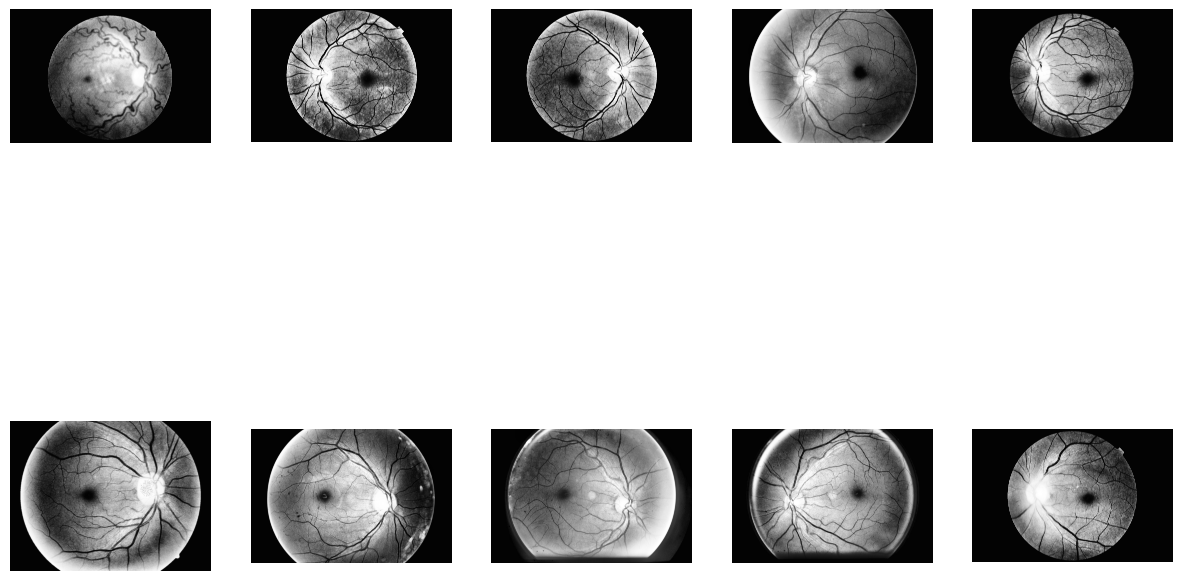

In [3]:
train_image_files = []
for subdir in os.listdir(train_dir):
    subdir_path = os.path.join(train_dir, subdir)
    if os.path.isdir(subdir_path):
        train_image_files.extend([os.path.join(subdir_path, file) for file in os.listdir(subdir_path) if file.endswith(('.png', '.jpg', '.jpeg'))])

# Load the first 10 images
images = [cv2.imread(file) for file in train_image_files[:10] if cv2.imread(file) is not None]

# Function to display images in a grid
def show_images(images, cols=5, rows=2):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
            ax.imshow(img_rgb)
            ax.axis('off')  # Hide axes
    plt.show()

# Show the loaded images
show_images(images)

In [4]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.25,
    height_shift_range=0.25,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

val_generator = ImageDataGenerator(
    rescale=1./255,
)

test_generator = ImageDataGenerator(
    rescale=1./255
)

In [5]:
TARGET_SIZE = (224,224)
BATCH_SIZE = 8

train_gen = train_generator.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical' 
)

val_gen = val_generator.flow_from_directory(
    val_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_generator.flow_from_directory(
    test_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)



Found 15907 images belonging to 5 classes.
Found 1770 images belonging to 5 classes.
Found 4422 images belonging to 5 classes.


In [6]:
batch_x, batch_y = next(iter(train_gen))
print("Input shape:", batch_x.shape)
print("Label shape:", batch_y.shape)


Input shape: (8, 224, 224, 3)
Label shape: (8, 5)


In [7]:
num_train_samples = train_gen.n
num_val_samples = val_gen.n

print(f"Number of training samples: {num_train_samples}")
print(f"Number of validation samples: {num_val_samples}")

Number of training samples: 15907
Number of validation samples: 1770


In [8]:
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, GlobalAveragePooling2D

base_model =  EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.trainable = True


I0000 00:00:1730134814.468520   78996 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730134814.471715   78996 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730134814.472874   78996 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730134814.584943   78996 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [9]:
print(f"NUmber of layers in the model: {len(base_model.layers)}")

NUmber of layers in the model: 1028


In [10]:
for layer in base_model.layers[:-200]:  # Freeze all layers except the last 200
    layer.trainable = False


In [11]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# model.summary()


In [12]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ rescaling[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      9,216 │ stem_activation[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │        128 │ block1a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 112, 112,  │          0 │ block1a_project_… │
│                     │ 32)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 112, 112,  │      9,216 │ block1a_add[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 112, 112,  │        128 │ block1b_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 112, 112,  │          0 │ block1b_drop[0][… │
│                     │ 32)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_co… │ (None, 112, 112,  │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_bn  │ (None, 112, 112,  │        128 │ block1c_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_ac… │ (None, 112, 112,  │          0 │ block1c_project_

 Total params: 118,109,861 (450.55 MB)

 Trainable params: 55,569,765 (211.98 MB)

 Non-trainable params: 62,540,096 (238.57 MB)

In [13]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, Precision, Recall

model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(),
        Recall(),
        AUC(multi_label=False, name='auc')
    ]
)

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from typing import Optional

class SimpleMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, every_n_epochs: int = 1, save_plots: bool = False, plot_path: str = 'accuracy_loss_plot.png'):
        super().__init__()
        self.every_n_epochs = every_n_epochs
        self.save_plots = save_plots
        self.plot_path = plot_path
        self.history = {
            'epochs': [],
            'train_accuracy': [],
            'val_accuracy': [],
            'train_loss': [],
            'val_loss': []
        }

    def on_epoch_end(self, epoch: int, logs: Optional[dict] = None) -> None:
        """Store accuracy and loss at the end of each epoch."""
        if logs is None:
            logs = {}
            
        # Append accuracy and loss to history
        self.history['epochs'].append(epoch + 1)
        self.history['train_accuracy'].append(logs.get('accuracy', 0))
        self.history['val_accuracy'].append(logs.get('val_accuracy', 0))
        self.history['train_loss'].append(logs.get('loss', 0))
        self.history['val_loss'].append(logs.get('val_loss', 0))
        
        # Log the results for this epoch
        tf.print(f'Epoch {epoch + 1}: Train Accuracy: {logs.get("accuracy", 0):.4f}, Val Accuracy: {logs.get("val_accuracy", 0):.4f}, '
                 f'Train Loss: {logs.get("loss", 0):.4f}, Val Loss: {logs.get("val_loss", 0):.4f}')
        
        # Plot the metrics every n epochs or at the last epoch
        if (epoch + 1) % self.every_n_epochs == 0 or epoch == self.params['epochs'] - 1:
            self.plot_metrics()

    def plot_metrics(self) -> None:
        """Plot accuracy and loss over epochs."""
        try:
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))

            # Plot accuracy
            axes[0].plot(self.history['epochs'], self.history['train_accuracy'], label='Train Accuracy', marker='o')
            axes[0].plot(self.history['epochs'], self.history['val_accuracy'], label='Val Accuracy', marker='o')
            axes[0].set_title('Accuracy over Epochs')
            axes[0].set_xlabel('Epochs')
            axes[0].set_ylabel('Accuracy')
            axes[0].legend()
            axes[0].grid(True)

            # Plot loss
            axes[1].plot(self.history['epochs'], self.history['train_loss'], label='Train Loss', marker='o')
            axes[1].plot(self.history['epochs'], self.history['val_loss'], label='Val Loss', marker='o')
            axes[1].set_title('Loss over Epochs')
            axes[1].set_xlabel('Epochs')
            axes[1].set_ylabel('Loss')
            axes[1].legend()
            axes[1].grid(True)

            plt.tight_layout()
            
            # Save or show the plot
            if self.save_plots:
                plt.savefig(self.plot_path)
                plt.close()
            else:
                plt.show()
                
        except Exception as e:
            tf.print(f"Error plotting metrics: {str(e)}")


In [16]:
from tensorflow.keras import mixed_precision

# Enable mixed precision
mixed_precision.set_global_policy('mixed_float16')


/home/ritika/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1730134853.817234   79271 service.cc:146] XLA service 0x7dc2f0004820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730134853.817268   79271 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-28 22:30:55.348955: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-28 22:30:59.582415: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-28 22:31:08.043627: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_57075', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1730134899.665833   79271 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proces

 777/1988 ━━━━━━━━━━━━━━━━━━━━ 8:07 402ms/step - accuracy: 0.2329 - auc: 0.5231 - loss: 2.5666 - precision: 0.2352 - recall: 0.1623

2024-10-28 22:37:04.751131: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58959', 8 bytes spill stores, 8 bytes spill loads



1988/1988 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.2548 - auc: 0.5501 - loss: 2.3702 - precision: 0.2633 - recall: 0.1717
Epoch 1: val_loss improved from inf to 1.37117, saving model to EfficientNet_model.keras
Epoch 1: Train Accuracy: 0.2939, Val Accuracy: 0.3807, Train Loss: 2.1237, Val Loss: 1.3712


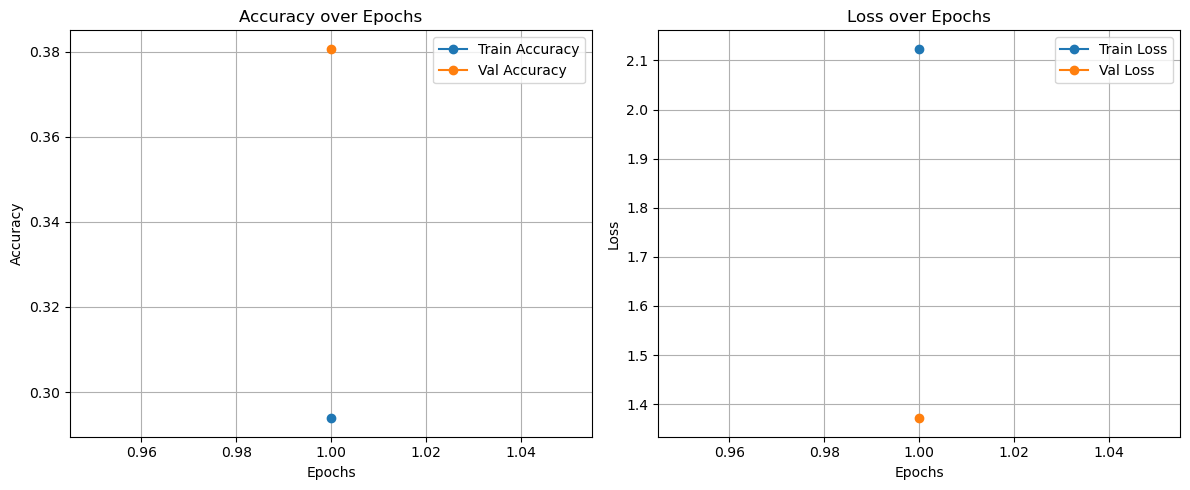

1988/1988 ━━━━━━━━━━━━━━━━━━━━ 1013s 470ms/step - accuracy: 0.2548 - auc: 0.5501 - loss: 2.3701 - precision: 0.2633 - recall: 0.1717 - val_accuracy: 0.3807 - val_auc: 0.7695 - val_loss: 1.3712 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/50
   1/1988 ━━━━━━━━━━━━━━━━━━━━ 3:47 115ms/step - accuracy: 0.2500 - auc: 0.6152 - loss: 3.1914 - precision: 0.4000 - recall: 0.2500

2024-10-28 22:47:14.542039: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-28 22:47:14.543061: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/ritika/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-28 22:47:23.601809: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 2: val_loss improved from 1.37117 to 1.12068, saving model to EfficientNet_model.keras
Epoch 2: Train Accuracy: 0.2500, Val Accuracy: 0.5000, Train Loss: 3.1914, Val Loss: 1.1207


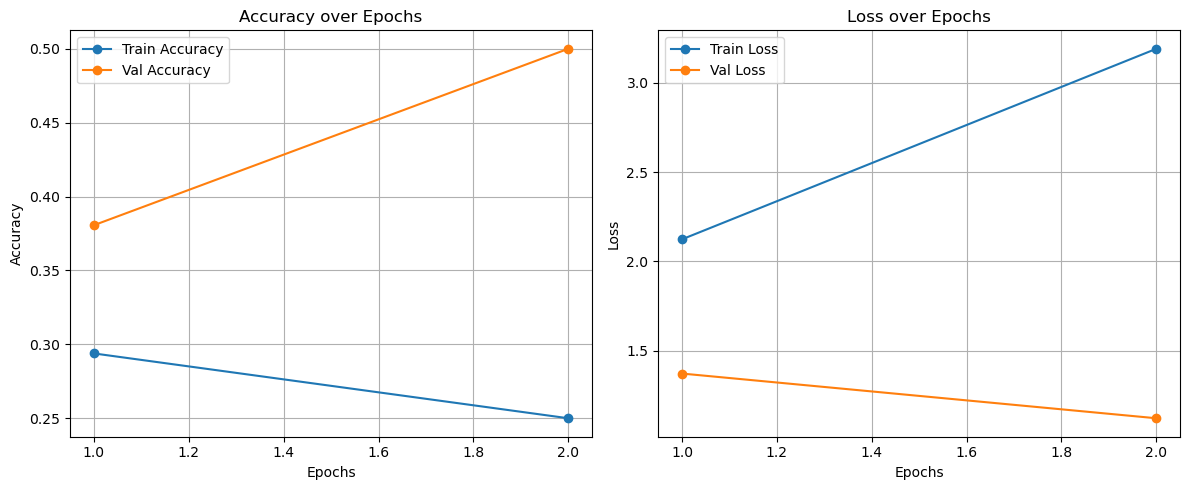

1988/1988 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2500 - auc: 0.6152 - loss: 3.1914 - precision: 0.4000 - recall: 0.2500 - val_accuracy: 0.5000 - val_auc: 0.9375 - val_loss: 1.1207 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.4084 - auc: 0.7001 - loss: 1.6646 - precision: 0.4508 - recall: 0.2748
Epoch 3: val_loss did not improve from 1.12068
Epoch 3: Train Accuracy: 0.4332, Val Accuracy: 0.5775, Train Loss: 1.6039, Val Loss: 1.1668


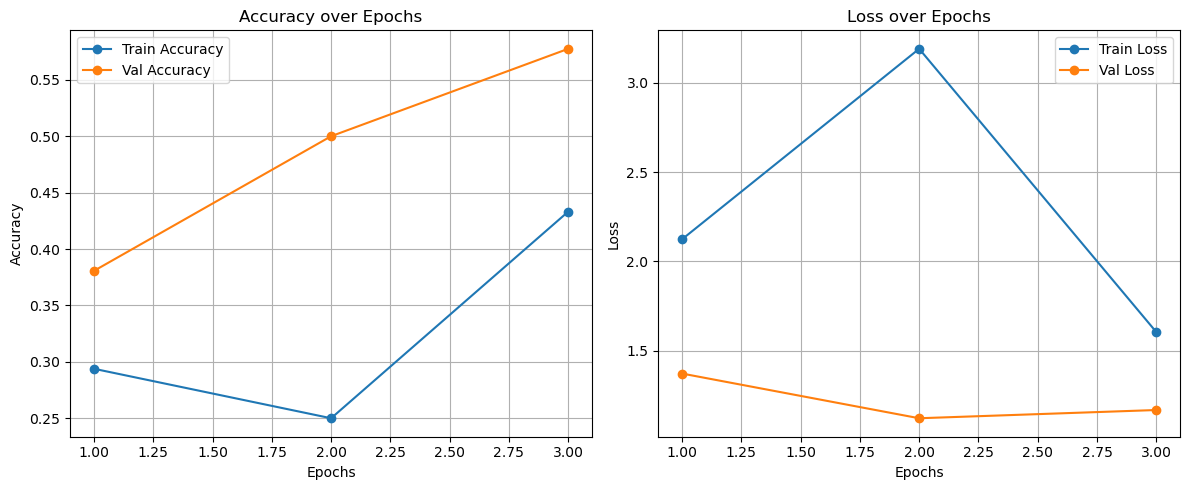

1988/1988 ━━━━━━━━━━━━━━━━━━━━ 885s 445ms/step - accuracy: 0.4084 - auc: 0.7001 - loss: 1.6645 - precision: 0.4508 - recall: 0.2749 - val_accuracy: 0.5775 - val_auc: 0.8253 - val_loss: 1.1668 - val_precision: 0.5775 - val_recall: 0.5775 - learning_rate: 1.0000e-04
Epoch 4/50
   1/1988 ━━━━━━━━━━━━━━━━━━━━ 3:30 106ms/step - accuracy: 0.6250 - auc: 0.8750 - loss: 0.9964 - precision: 1.0000 - recall: 0.5000
Epoch 4: val_loss improved from 1.12068 to 0.60916, saving model to EfficientNet_model.keras


2024-10-28 23:02:11.344491: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Epoch 4: Train Accuracy: 0.6250, Val Accuracy: 1.0000, Train Loss: 0.9964, Val Loss: 0.6092


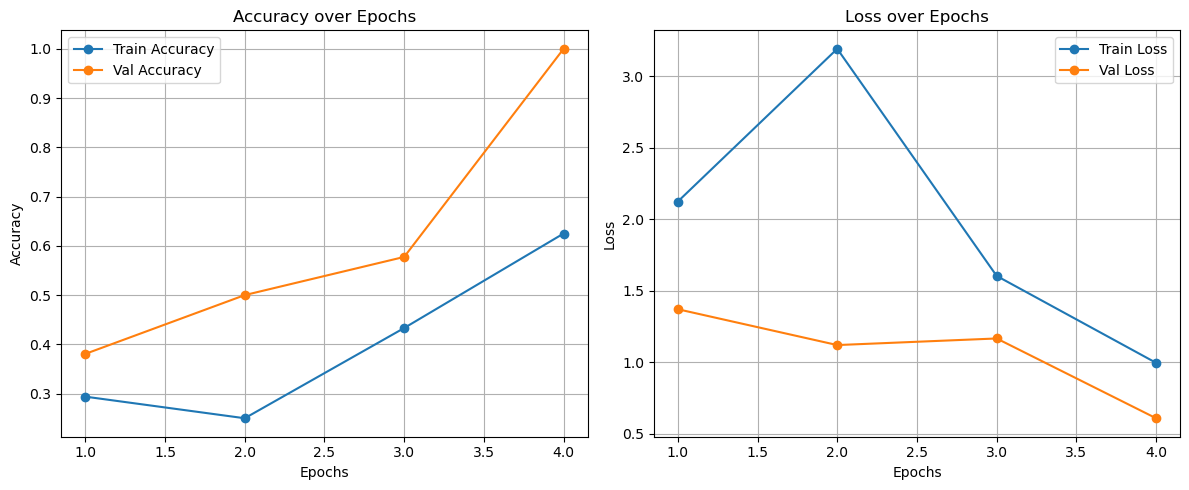

1988/1988 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6250 - auc: 0.8750 - loss: 0.9964 - precision: 1.0000 - recall: 0.5000 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.6092 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 5/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.4863 - auc: 0.7612 - loss: 1.4360 - precision: 0.5272 - recall: 0.3552
Epoch 5: val_loss did not improve from 0.60916
Epoch 5: Train Accuracy: 0.4881, Val Accuracy: 0.5781, Train Loss: 1.4199, Val Loss: 1.1519


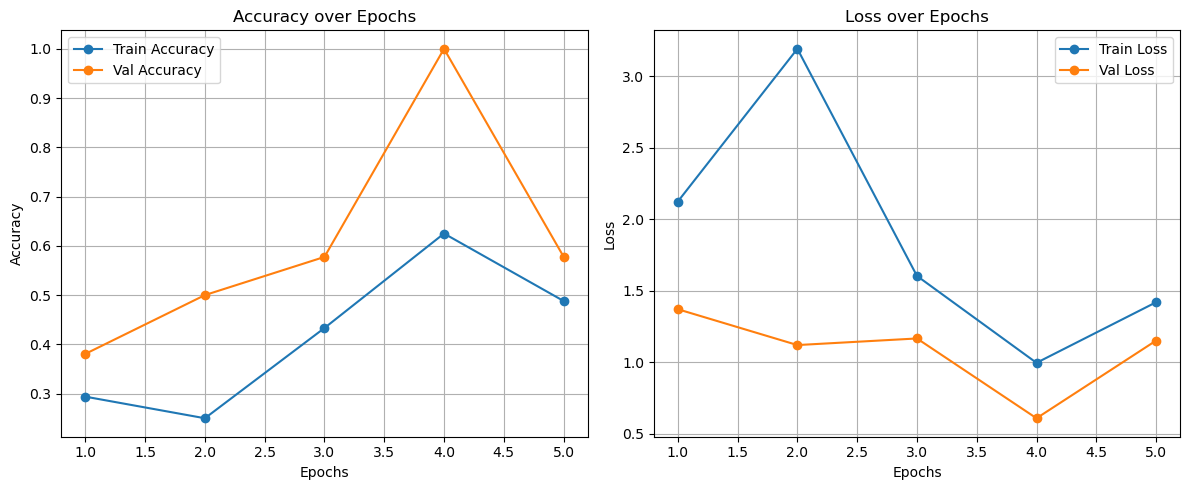

1988/1988 ━━━━━━━━━━━━━━━━━━━━ 889s 447ms/step - accuracy: 0.4863 - auc: 0.7612 - loss: 1.4360 - precision: 0.5272 - recall: 0.3552 - val_accuracy: 0.5781 - val_auc: 0.8231 - val_loss: 1.1519 - val_precision: 0.5781 - val_recall: 0.5781 - learning_rate: 1.0000e-04
Epoch 6/50
   1/1988 ━━━━━━━━━━━━━━━━━━━━ 3:28 105ms/step - accuracy: 0.6250 - auc: 0.8984 - loss: 0.9024 - precision: 0.6667 - recall: 0.5000
Epoch 6: val_loss did not improve from 0.60916
Epoch 6: Train Accuracy: 0.6250, Val Accuracy: 0.5000, Train Loss: 0.9024, Val Loss: 1.0316


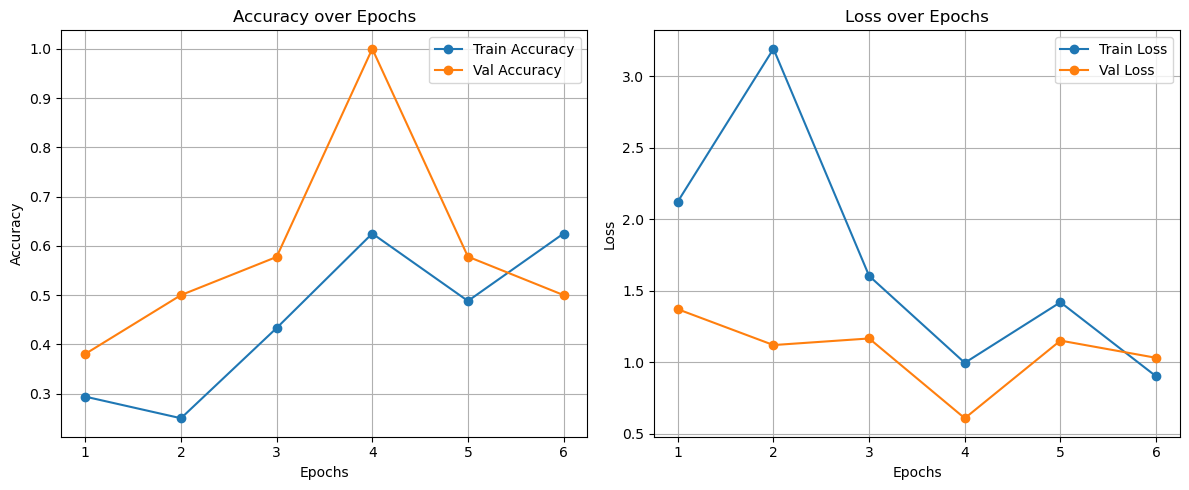

1988/1988 ━━━━━━━━━━━━━━━━━━━━ 0s 122us/step - accuracy: 0.6250 - auc: 0.8984 - loss: 0.9024 - precision: 0.6667 - recall: 0.5000 - val_accuracy: 0.5000 - val_auc: 0.9375 - val_loss: 1.0316 - val_precision: 0.5000 - val_recall: 0.5000 - learning_rate: 1.0000e-04
Epoch 7/50
1057/1988 ━━━━━━━━━━━━━━━━━━━━ 6:17 406ms/step - accuracy: 0.4981 - auc: 0.7774 - loss: 1.3663 - precision: 0.5274 - recall: 0.3679

KeyboardInterrupt: 

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('EfficientNet_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
callback = SimpleMetricsCallback()


history = model.fit(
    train_gen,
    steps_per_epoch= num_train_samples//BATCH_SIZE,
    validation_data=val_gen,
    validation_steps= num_val_samples//BATCH_SIZE,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr, callback]
)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/media/ritika/BAB4DC86B4DC4713/ICDCIT/EfficientNet_model.keras')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('EfficientNet_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
custom_metrics_callback = SimpleMetricsCallback(every_n_epochs=5)

model.optimizer.lr = 0.00001

history = model.fit(
    train_gen,
    steps_per_epoch=num_train_samples//BATCH_SIZE,
    validation_data=val_gen,
    validation_steps=num_val_samples//BATCH_SIZE,
    epochs=50,            
    initial_epoch=6,     
    callbacks=[early_stopping, model_checkpoint, reduce_lr,custom_metrics_callback]
)


Epoch 7/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.4685 - auc: 0.7519 - loss: 1.4762 - precision: 0.5010 - recall: 0.3363